<a href="https://colab.research.google.com/github/mfdali/BootcampDataAnalytics/blob/main/Statistics_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics with Python
author: Monique Dali @mfdali

Bootcamp challenge @WoMakersCode

You are a researcher at a prep course for students aiming to enter university in 2025.

* Goal: Extract information from the previous year's test dataset to
better align the prep course strategies for each student

* Dataset: 6 columns, where 5 represent the test subjects and one represents the gender of the test takers. The dataset consists of 1000 entries, with each entry representing one individual. No missing data

* Data file: enem_2023.json

##  Import libraries




In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# statistics
import scipy.stats as stat

## 1 - Load data

In [58]:
# Read the dataset into a pandas dataframe
df_enem = pd.read_json('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/enem_2023.json')

In [59]:
# Check dataframe
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


## 2 - Data exploration

In [60]:
# Check data type of columns
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [61]:
# Checking for missing values
df_enem.isnull().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [62]:
# Handling missing values (if any)
# Filling missing numerical values with mean,mode,median,0,etc
clean_enem = df_enem.fillna(0)

## 3 - Data analysis: Descriptive statistics

In [63]:
# Summary statistics of numerical columns
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [64]:
# Summary statistics of categorical columns
df_enem.describe(include=['object'])

,Sexo
count,1000
unique,3
top,Homem
freq,481


1 - Which subject has the highest score range?

In [65]:
# Calculate amplitude without last cathegorical column
amplitude_df = df_enem.iloc[:,:-1].max() - df_enem.iloc[:,:-1].min()
amplitude_df.sort_values(ascending=False,inplace=True)

In [66]:
# Show table
amplitude_df

Redação                 729.160035
Linguagens              517.456317
Matemática              488.077902
Ciências da natureza    487.604568
Ciências humanas        474.019695
dtype: float64

In [67]:
# Get highest range
amplitude_df.head(1)

Redação    729.160035
dtype: float64

2 - What are the mean and median for each subject?

In [38]:
# Mean
df_enem.mean(numeric_only=True)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [40]:
# Median
df_enem.median(numeric_only=True)

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

3 - Considering the Computer Science course at UFPE, where each subject is weighted as follows:

| Discipline                               | Weight |
|------------------------------------------|--------|
| Essay Writing                            | 2      |
| Mathematics and its Technologies         | 4      |
| Languages, Codes, and their Technologies | 2      |
| Humanities and their Technologies        | 1      |
| Natural Sciences and their Technologies  | 1      |

What is the standard deviation and mean of the scores for the top 500 students considering these weights?

In [68]:
# test weights
weights = pd.Series({'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1})

In [74]:
# average weights
weighted_average = (clean_enem.iloc[:,:-1]*weights).sum(axis=1)/sum(weights)

In [77]:
# top 500 mean
weighted_average.nlargest(500).mean()

561.879106490385

In [78]:
# top 500 standard deviation
weighted_average.nlargest(500).std()

35.994266397324274

4 - If all these students applied for computer science and there are only 40 spots available, what would be the variance and mean of the scores for the students who got into the computer science course?

In [79]:
# top 40 mean
weighted_average.nlargest(40).mean()

636.6827415075188

In [80]:
# top 40 standard deviation
weighted_average.nlargest(40).std()

17.19789241739842

5 - What is the third quartile upper limit for the subjects of Mathematics and Languages?

In [95]:
# Calculate third quartile
math_third_quartile = df_enem['Matemática'].quantile(0.75)

In [87]:
# Calculate third quartile
language_third_quartile = df_enem['Linguagens'].quantile(0.75)

In [96]:
print("Mathematics third quartile: %g \nLanguage third quartile: %g\n" % (math_third_quartile,language_third_quartile))

Mathematics third quartile: 592.913 
Language third quartile: 571.636



6 - Create histograms for Essay Writing and Languages, with bins of 20 points each. Can we say these histograms are symmetric? Justify and classify if not symmetric.

In [121]:
def histogram(df,limits=False):
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include=np.number).columns:
      plt.figure(figsize=(8, 4))
      sns_plot = sns.histplot(data = df , x = column, bins=np.arange(0, 1001, 20), kde= True, color='palevioletred', edgecolor='indigo',stat="density")
      if limits == True:
        # axis limits
        sns_plot.set_xlim(0, 1000)
        #sns_plot.ax_marg_y.set_ylim(0, 1000)

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.title("Histogram: "+column)

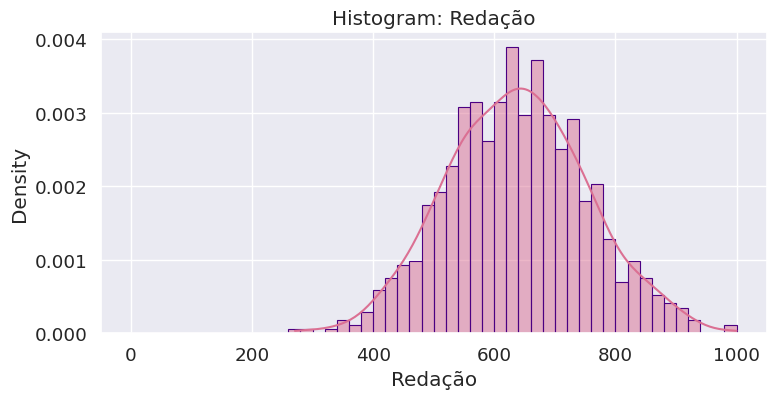

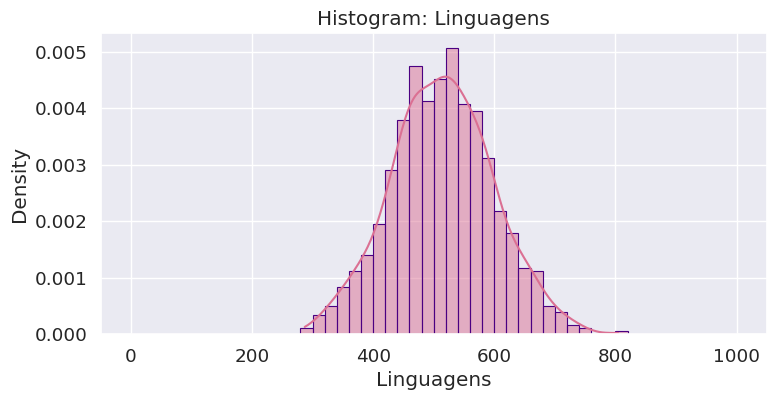

In [122]:
histogram(df_enem[['Redação','Linguagens']])

Yes, both distributions are symmetric.

7 - Now set a fixed range from 0 to 1000. Do you still hold the same opinion about symmetry?

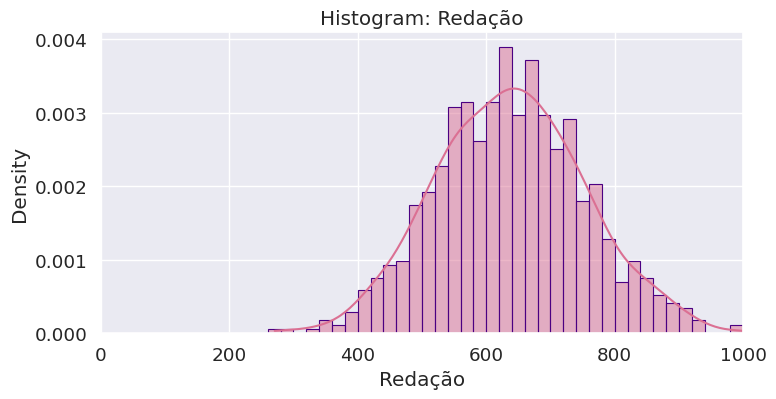

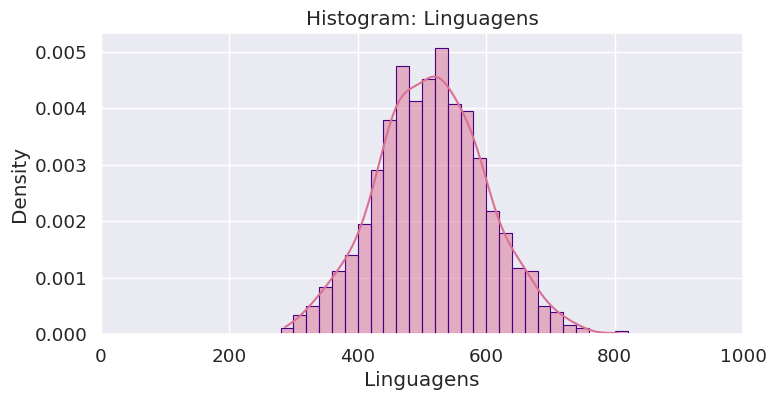

In [123]:
histogram(df_enem[['Redação','Linguagens']],limits=True)

Yes, it looks like a normal distribution

8 - Create a boxplot of the quartile for all subjects of natural sciences and essay writing. Is it possible to identify outliers? Use the IQR method.

Ciências da natureza       Axes(0.125,0.53;0.168478x0.35)
Redação                 Axes(0.327174,0.53;0.168478x0.35)
dtype: object

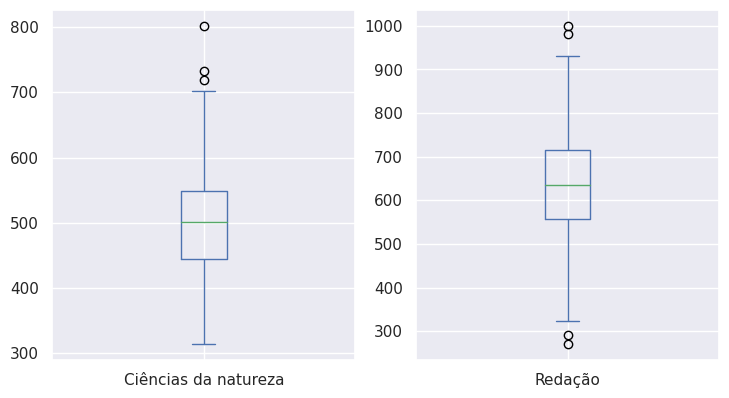

In [113]:
# Create boxplots
df_enem.plot(column=['Ciências da natureza','Redação'],kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10))

In [155]:
def find_outlier_iqr(dataset, colname):
    # Calculate quartiles handling nan values
    q25, q75 = np.nanquantile(dataset[colname], 0.25), np.nanquantile(dataset[colname], 0.75)
    # Calculate IQR
    iqr = q75 - q25
    # Calculate outlier cutoff
    cut_off = iqr * 1.5
    # Calculate lower e upper limits
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is %d\n' % iqr)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('The number of outliers found in %s were %d\n'%(colname,len(outliers)))
    return lower, upper, outliers

In [156]:
# Loop for each column in dataset
for column in df_enem[['Ciências da natureza','Redação']].select_dtypes(include=np.number).columns:
  lower, upper, out =  find_outlier_iqr(df_enem, column)

The IQR is 104

The number of outliers found in Ciências da natureza were 3

The IQR is 159

The number of outliers found in Redação were 4



9 - Remove all outliers and check if they are capable of significantly altering the national average. (consider significantly a value above 5%)

In [257]:

def remove_outlier_iqr(df):

  for column in df.select_dtypes(include=np.number).columns:
    # Calculate quartiles handling nan values
    q25, q75 = np.nanquantile(df[column], 0.25), np.nanquantile(df[column], 0.75)
    # Calculate IQR
    iqr = q75 - q25
    # Calculate outlier cutoff
    cut_off = iqr * 1.5
    # Calculate lower e upper limits
    lower, upper = q25 - cut_off, q75 + cut_off

    #Remove all outliers
    df_no_outliers = df[column][~((df[column] < (q25 - 1.5 * iqr)) | (df[column]> (q75 + 1.5 * iqr)))]

    # Calculate difference between new mean and original mean
    diff = (abs(df[column].mean(numeric_only=True)-df_no_outliers.mean(numeric_only=True))/df[column].mean(numeric_only=True))*100

    # Display comparison
    print('The percentual of difference in %s is %2.3g \n'%(column,diff))

  return

In [255]:
#Function to calculate difference in mean before and after remove outliers
remove_outlier_iqr(df_enem)

The difference in Linguagens is 0.002 

The difference in Ciências humanas is 0.22 

The difference in Ciências da natureza is 0.11 

The difference in Matemática is 0.051 

The difference in Redação is 0 



There is no significant difference after removing outliers.

10 - Considering null values, try to find the best trend measure that can replace null grades. Mean, mode, or median? Replace the value for all three and say which one changes the general mean and standard deviation the least.

In [167]:
# Replace NaN values in a specific column with the mean of the column
mean_value = df_enem.mean(numeric_only=True)
df_mean_enem = df_enem.fillna(mean_value)

# Replace NaN values in a specific column with the median of the column
median_value = df_enem.median(numeric_only=True)
df_median_enem = df_enem.fillna(median_value)

# Replace NaN values in a specific column with the mode of the column
mode_value = df_enem.iloc[:,:-1].mode()
df_mode_enem = df_enem.fillna(mode_value.iloc[0]) # [0] gets the first value of the series

In [178]:
# Calculate mean, median, and standard deviation
general_mean = df_enem.mean(numeric_only=True)
nan_mean = df_mean_enem.mean(numeric_only=True)
nan_median = df_median_enem.mean(numeric_only=True)
nan_mode = df_mode_enem.mean(numeric_only=True)

In [179]:
# Calculate mean, median, and standard deviation
general_std = df_enem.std(numeric_only=True)
nan_mean_std = df_mean_enem.std(numeric_only=True)
nan_median_std = df_median_enem.std(numeric_only=True)
nan_mode_std = df_mode_enem.std(numeric_only=True)

In [211]:
# Create a DataFrame to display the comparison
comparison_mean_df = pd.concat([abs(general_mean-nan_mean),abs(general_mean-nan_median),abs(general_mean-nan_mode)], axis=1)
comparison_mean_df.columns = ['mean','median','mode']

# Add a line with euclidean distance
comparison_mean_df.loc['Difference'] = np.linalg.norm(comparison_mean_df, axis=0)

In [212]:
# Create a DataFrame to display the comparison
comparison_std_df = pd.concat([abs(general_std-nan_mean_std),abs(general_std-nan_median_std),abs(general_std-nan_mode_std)], axis=1)
comparison_std_df.columns = ['mean','median','mode']

# Add a line with euclidean distance
comparison_std_df.loc['Difference'] = np.linalg.norm(comparison_std_df, axis=0)

In [213]:
# Display the comparison between methods to replace NaNs
# mean
comparison_mean_df

,mean,median,mode
Linguagens,1.136868e-13,0.053605,23.435055
Ciências humanas,1.136868e-13,0.161431,15.177106
Ciências da natureza,5.684342e-14,0.204808,32.545143
Matemática,0.000000e+00,0.206560,16.428590
Redação,0.000000e+00,0.351338,51.372099
Difference,1.705303e-13,0.486811,68.903729


In [215]:
# Display the comparison between methods to replace NaNs
# standard deviation
comparison_std_df

,mean,median,mode
Linguagens,4.448595,4.448438,21.430481
Ciências humanas,2.533713,2.531179,17.261659
Ciências da natureza,7.273727,7.272352,21.610043
Matemática,3.361113,3.357996,14.452866
Redação,8.386798,8.383249,50.993362
Difference,12.678811,12.674288,63.509312


The best trend measure to replace null grades is mean. It almost did not change the mean and the standard deviation of the original data.